In [30]:
import json
from io import open
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_color_codes()
plt.rcParams['figure.figsize'] = (6,4)

In [6]:
data = json.loads(open('../data/ace_05_yaat.json', 'r').read())

In [7]:
doc = data.values()[0]

In [8]:
tokens = doc['tokens']
annotations = doc['annotations']

### Distribution of document lengths

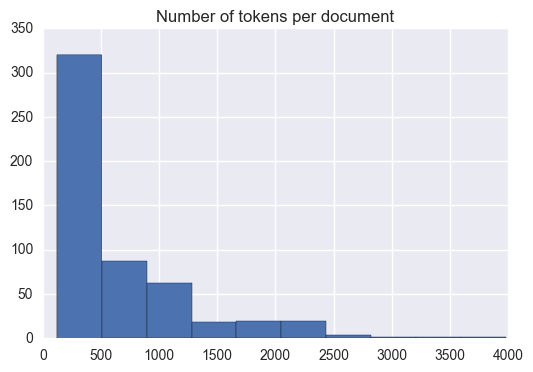

In [25]:
doclens = [len(doc['tokens']) for doc in data.values()]
plt.hist(doclens)
plt.title("Number of tokens per document")
print

### Distributions of number of sentences and their lengths per doc

In [17]:
docs_sentences = []
for doc in data.values():
    doc_sentences = []
    sentence = []
    for token in doc['tokens']:
        sentence.append(token)
        if token == '.':
            doc_sentences.append(sentence)
            sentence = []
    if sentence:
        doc_sentences.append(sentence)
    docs_sentences.append(doc_sentences)

In [18]:
print len(docs_sentences)

535


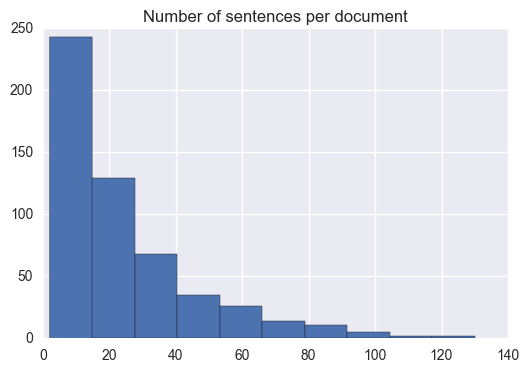

In [26]:
num_sentences_per_doc = [len(doc_sentences) for doc_sentences in docs_sentences]
plt.hist(num_sentences_per_doc)
plt.title("Number of sentences per document")
print

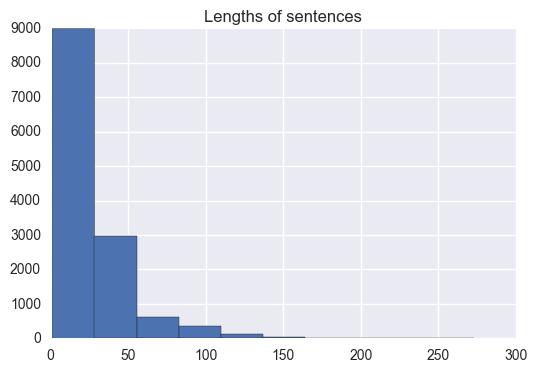

In [27]:
sentence_lens = [len(sentence) for doc_sentences in docs_sentences for sentence in doc_sentences ]
plt.hist(sentence_lens)
plt.title("Lengths of sentences")
print

### Variance of sentence lengths per document

In [31]:
docs_sentence_lens = [[len(sentence) for sentence in doc_sentences] for doc_sentences in docs_sentences ]
avg_sentence_lens = [np.mean(doc_sentence_lens) for doc_sentence_lens in docs_sentence_lens]
std_sentence_lens = [np.std(doc_sentence_lens) for doc_sentence_lens in docs_sentence_lens]

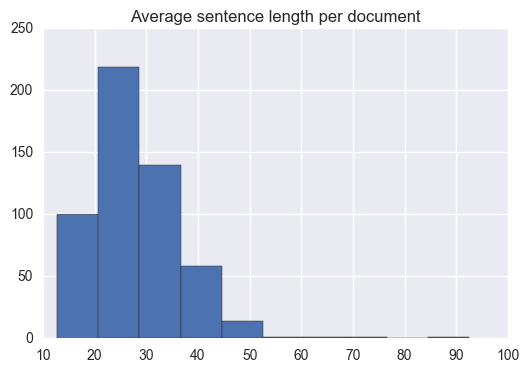

In [32]:
plt.hist(avg_sentence_lens)
plt.title("Average sentence length per document")

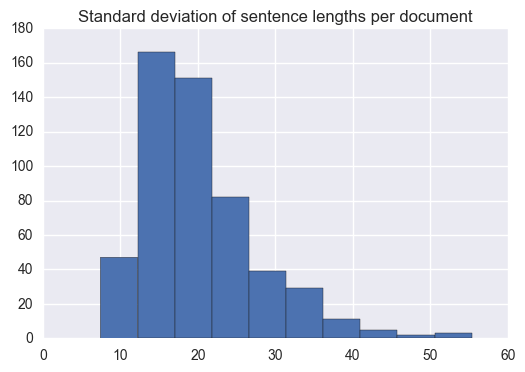

In [33]:
plt.hist(std_sentence_lens)
plt.title("Standard deviation of sentence lengths per document")

The length of sentences within the documents has a high standard deviation, and since we need to process an entire document per batch, there is no easy way to bucket the model to make it efficient for sequence lengths

### Conclusion: Process entire documents as a sequence, and do the model bucketing at the document level